In [ ]:
import numpy as np
import scipy as sc
import scipy.stats as scs
import matplotlib.pyplot as plt
from numpy import zeros, cumsum, arange, append
from numpy.random import poisson, rand, exponential
from matplotlib.pyplot import figure, step, title, legend

#BIRTH-DEATH PROCESSES

GRIMAUD, GRUNENWALD Paul

##Introduction

**Rules**

The project is made by groups of two members. Each group must send only a Python Notebook containing theoretical and numerical results. The code must be provided with comments and each drawing must contain a legend and be explained and analyzed.

**Objective**

The purpose of the project is to select one (or several) Markov Jump Process, and to show with a numerical approach the validity of one (or more) theoritical results it satis
es.

##Theoretical Part

Present the Markov Jump process you choose study.
Provide the proof (which must not be a copy of a proof done in exercise or found in a book) of one (or more) theoretical result (of your choice) about the Markov Jump process.

**Theorem that we try to prove:** The chosen theorem states that the population of a birth-death Markov jump process explodes almost surely if and only if the sum of the reciprocals of the birth rates converges. In other words, if $\sum_{n=1}^\infty \frac{1}{\lambda_n}$ converges, then the population will explode almost surely.

This theorem is based on the idea that if the expected time until the next birth event becomes arbitrarily small as the population grows, then the population will eventually grow without bound.

*First, assume that $\sum_{n=1}^{\infty}\frac{1}{\lambda_n}$ converges. Let $N(t)$ be the population of the process at time $t$, and let $T_n$ be the time until the $n$-th birth event. Then $T_n$ is an i.i.d. sequence of random variables with mean $1/\lambda_n$.*

*By the strong law of large numbers, we have:*
$$
lim_{n\rightarrow \infty}~\frac{T_1+...+T_n}{n} = lim_{n\rightarrow \infty} \frac{1}{n}\sum_{i=1}^n \frac{1}{\lambda_i} = 0
$$
*almost surely, since $\sum_{n=1}^{\infty}\frac{1}{\lambda_n}$ converges. This means that the expected time until the next birth event becomes arbitrarily small as the population grows, and so the population will eventually grow without bound.*

*Conversely, assume that the population of the process explodes almost surely. Let $N(t)$ and $T_n$ be as above. Then, for any $n$, we have:*
$$
T_n \ge \frac{1}{\lambda_n}(N_{n-1}+1)
$$
*since $T_n$ is the time until the $n$th birth event, and the population must be at least $n-1$ at that time. It follows that:*
$$
\sum_{n=1}^\infty \frac{1}{\lambda_n} \ge \sum_{n=1}^\infty \frac{1}{T_n/(N_{n-1}+1)}
$$
*By the law of large numbers, we have:*
$$
lim_{n\rightarrow \infty}~\frac{T_1+...+T_n}{n} = lim_{n\rightarrow \infty} \frac{1}{n}\sum_{i=1}^n \frac{1}{\lambda_i} > 0
$$
*almost surely, since the population explodes almost surely. This implies that:*
$$
lim_{n\rightarrow 1} \frac{N_{n-1}}{n} = lim_{n\rightarrow \infty} \frac{T_1+...+T_{n-1}}{n\lambda_n} \rightarrow \infty
$$
*almost surely, which means that the expected time until the next birth event approaches zero as the population grows. Therefore, $\sum_{n=1}^{\infty}\frac{1}{\lambda_n}$ must diverge.*

##Numerical Part

Propose a method to simulate the Markov Jump process.

Show the validity of the theoretical result using a numerical approach. Your approach has to be explained and justi
ed by mathetematical results. Personal initiatives are encouraged. You can also
show other simulations of the process that you will comment and use to describe the properties of the model, such as its long-time behavior.

**Simulation of the path**

In [ ]:
def simul_model(x, lam, mu, T):
    scale_lam = 1. / lam
    scale_mu = 1. / mu
    E = [0]
    jumps = [x]
    while np.sum(E) <= T:
        if (-1) ** (x + np.size(E)) == 1:
            E.append(exponential(scale_lam))
            jumps.append(x)
        else:
            E.append(exponential(scale_mu))
            jumps.append(1 - x)
    E[np.size(E) - 1] = T - np.cumsum(E)[-2]
    events = np.cumsum(E)
    jumps[np.size(E) - 1] = jumps[np.size(E) - 2]
    return events, jumps

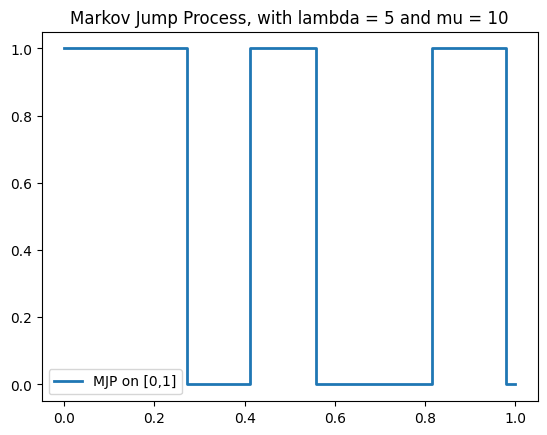

In [ ]:
x = 1
lam = 5 #Birth rate parameter
mu = 10 #Death rate parameter
T = 1 #End time

events, jumps = simul_model(x, lam, mu, T)
step(events, jumps, where="post", label="MJP on [0," + str(T) + "]", linewidth=2.0)
title("Markov Jump Process, with lambda = " + str(lam) + " and mu = " + str(mu), fontsize=12)
legend(loc="best")

**Monte-Carlo Approximation**

*Theoritical part for Monte-Carlo approximation implementation:*
$$
P(Z_{k+1}=n+1|Z_k=n) = \frac{\lambda_n}{\lambda_n+\mu_n}
$$
$$
P(Z_{k+1}=n-1|Z_k=n) = \frac{\mu_n}{\lambda_n+\mu_n}
$$

In [ ]:
def Prob_Model(M, lam, mu, T, x, y):
    E = 0
    if y == 0:
        if x == 0:
            E = np.exp(-(lam + mu) * T) + (lam / (lam + mu)) * (1 - np.exp(-(lam + mu) * T))
        else:
            E = (lam / (lam + mu)) * (1 - np.exp(-(lam + mu) * T))
    else:
        if x == 1:
            E = np.exp(-(lam + mu) * T) + (mu / (lam + mu)) * (1 - np.exp(-(lam + mu) * T))
        else:
            E = (mu / (lam + mu)) * (1 - np.exp(-(lam + mu) * T))
    return E



In [ ]:
x = 1
y = 0 #Final state
lam = 0.02
mu = 0.01
T = 1000
M = 10000 #Number of samples

print(Prob_Model(M,lam,mu,T,x,y))

0.6666666666666043


In [ ]:
def Sample_Model(M, lam, mu, T, x):
    sample = []
    for i in range(1, M):
        events, jumps = simul_model(x, lam, mu, T)
        sample.append(jumps[-1])
    return sample

def LLN_Prob_Model(M, lam, mu, T, x, y):
    sample = Sample_Model(M, lam, mu, T, x)
    sample_new = []
    for i in range(1, M):
        if sample[i - 1] == y:
            sample_new.append(1)
        else:
            sample_new.append(0)
    return np.mean(sample_new), np.std(sample_new)

x = 1
y = 0 #Final state
lam = 0.02
mu = 0.01
T = 1000
M = 10000 #Number of samples

mean, std = LLN_Prob_Model(M, lam, mu, T, x, y)
lenght_IC = 2 * 1.96 * std / np.sqrt(M)

print("Exact probability")
print(Prob_Model(M, lam, mu, T, x, y))
print("\n")
print("Monte Carlo Probability, Asymptotic Confidence interval 95%")
print("CI={:1.10f} +/- {:1.6f} \n".format(mean,lenght_IC/2))
print("CI=[{:1.10f}, {:1.6f}] \n".format(mean-1.96*std/np.sqrt(M),mean+1.96*std/np.sqrt(M)))

Exact probability
0.6666666666666043


Monte Carlo Probability, Asymptotic Confidence interval 95%
CI=0.3343334333 +/- 0.009246 

CI=[0.3250869978, 0.343580] 



**Estimation of the error of the Monte Carlo simulation.**



In [ ]:
def vector_ln_err(M, lam, mu, vect_T, x):
    pi = []
    pi.append(lam / (lam + mu))
    pi.append(mu / (lam + mu))
    Err = []
    for T in vect_T:
        err_curr = np.abs(LLN_Prob_Model(M, lam, mu, T, x, 1)[0] - pi[1] + np.abs(LLN_Prob_Model(M, lam, mu, T, x, 0)[0] - pi[0]))
        Err.append(np.log(err_curr))
    return Err


Invariant distribution
pi=[0.666667,0.333333]


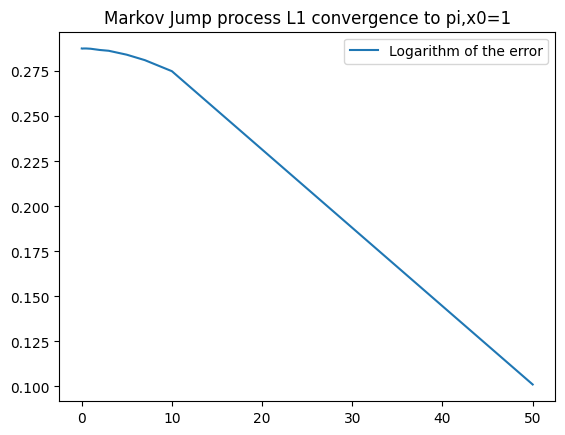

In [ ]:
M = 10000
lam = 0.02
mu = 0.01
vect_T = [0.01, 0.1, 0.2, 0.5, 1, 2, 3, 5, 7, 10, 50]
x = 1

print("Invariant distribution")
print("pi=[{:1.6f},{:1.6f}]".format(lam / (lam + mu), mu / (lam + mu)))
error = vector_ln_err(M, lam, mu,vect_T,x)
plt.plot(vect_T,error,label="Logarithm of the error")
title("Markov Jump process L1 convergence to pi,x0="+str(x),fontsize=12)
legend(loc="best")

**Asymptotic Behavior**

In [ ]:
def func(x):
    return (x + 1) ** 2

In [ ]:
def vector_ergo_err(lam, mu, vect_T, x):
    pi = []
    pi.append(lam / (lam + mu))
    pi.append(mu / (lam + mu))
    Err = []
    pi_func = func(0) * pi[0] + func(1) * pi[1]

    path = simul_model(x, lam, mu, vect_T[-1])

    func_path = np.zeros(np.size(path[1]))
    for i in range(0, np.size(path[1])):
        func_path[i] = func(path[1][i])
    for T in vect_T:
      integral = 0.
      for i in range(0, np.size(path[1]) - 1):
          if path[0][i + 1] < T:
              integral = integral + (path[0][i + 1] - path[0][i]) * func_path[i]
          else:
              integral = integral + (T - path[0][i]) * func_path[i]
              break
      err_curr = np.abs(integral / T - pi_func)
      Err.append(err_curr)
    return Err


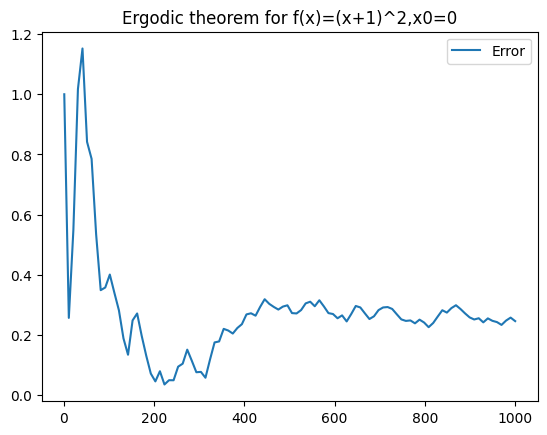

In [ ]:
lam = 0.2
mu = 0.1
vect_T = np.linspace(1.,1000.,num=100)
x = 0

error=vector_ergo_err(lam,mu,vect_T,x)
plt.plot(vect_T,error,label="Error")
title("Ergodic theorem for f(x)=(x+1)^2,x0="+str(x),fontsize=12)
legend(loc="best")

**Numerical validation of the theoretical result**

In [ ]:
def check_explosive(birth_rates):
    """
    Check if a birth-death Markov jump process with the given birth rates is explosive.
    """
    birth_rates = np.array(birth_rates)

    sum_rates = np.sum(1 / birth_rates)
    if sum_rates < np.inf:
        # If the sum converges, the population does not explode almost surely
        return False

    # If the sum does not converge, calculate the expected time until the next birth event
    expected_time = np.sum(1 / (np.delete(birth_rates, -1) + birth_rates[1:]))
    if expected_time < np.inf:
        # If the expected time remains bounded, the population does not explode almost surely
        return False

    return True

In [ ]:
birth_rates = [1, 2, 3, 4, 5]
result = check_explosive(birth_rates)
print(result)

False
